# **Assignment 1.2 Exercises on Computational Thinking with Python:**

Marquez, Keith Leigh Zhen R. and Marquez, Clard

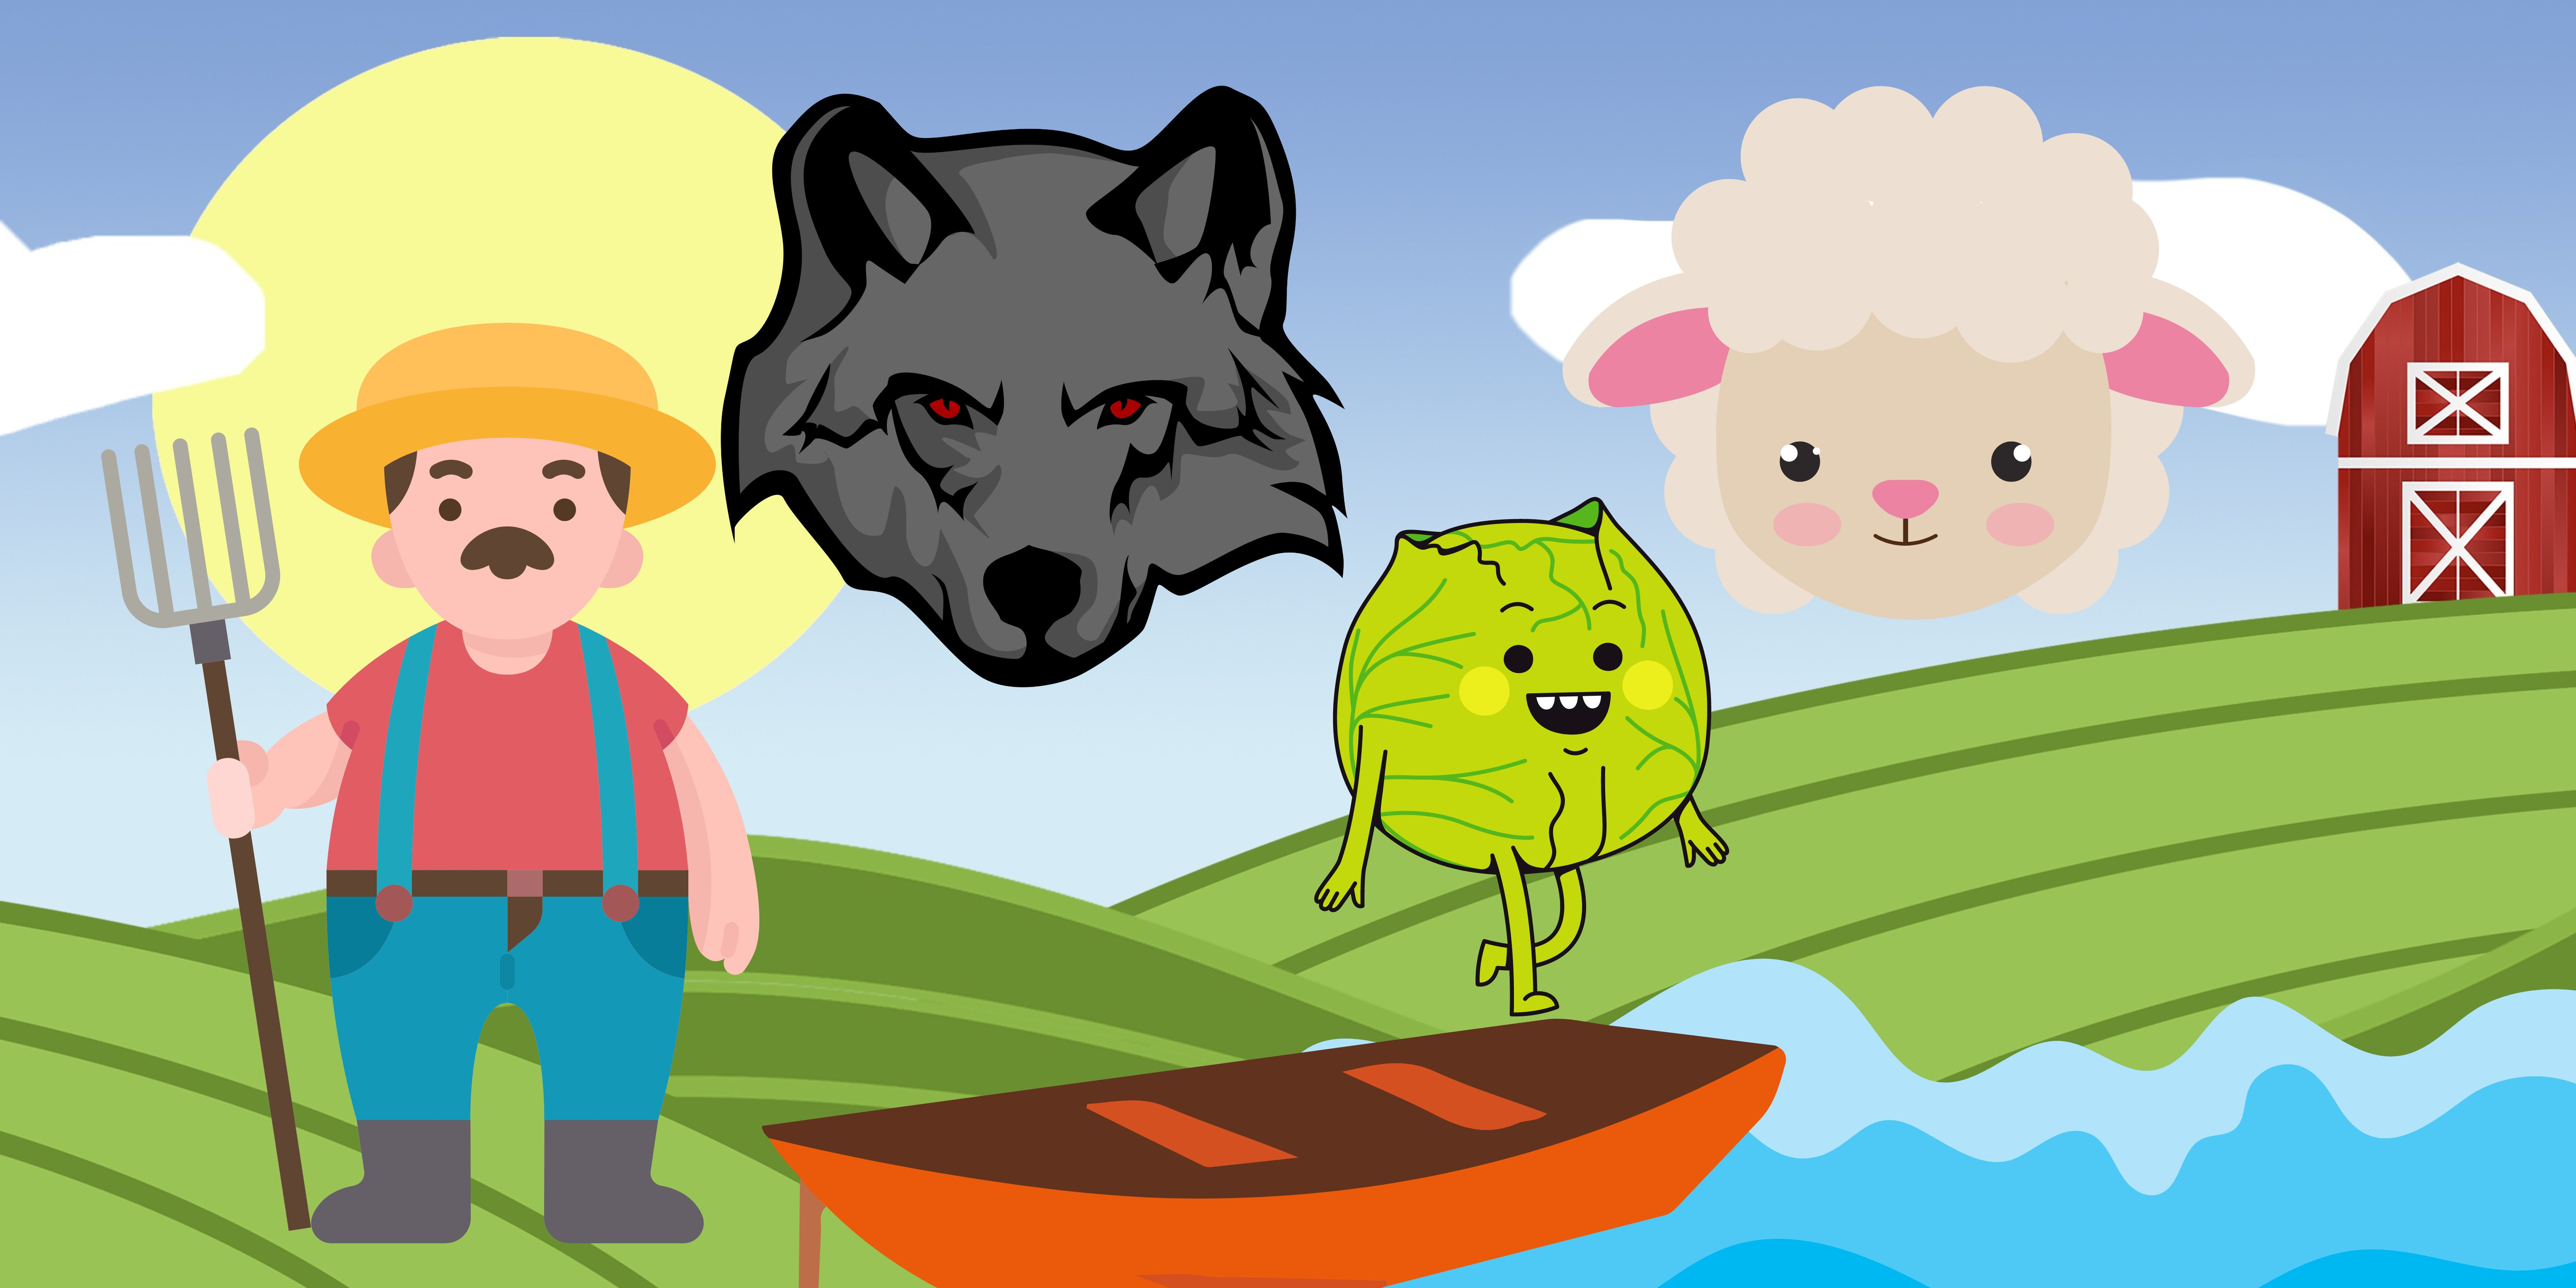

# **Code:**

In [ ]:
class Farmer:
    def __init__(self, original, farside):
        self.item = None
        self.atOriginal = True
        self.atFarside = False
        self.original = original
        self.farside = farside


    def move(self):
        if self.atOriginal == True:
            self.atOriginal = False
            self.atFarside = True
        else:
            self.atOriginal = True
            self.atFarside = False

    def take(self, item):
        if self.atOriginal == True:
            if item in self.original:
                self.item = item
                self.original.remove(item)
            else:
                print(f"{item.name} is not at the original location.")
        else:
            if item in self.farside:
                self.item = item
                self.farside.remove(item)
            else:
                print(f"{item.name} is not at the farside location.")

    def place(self):
        if self.item == None:
            print("Farmer is not holding an item!")
        else:
            if self.atOriginal == True:
                self.original.append(self.item)
                self.item = None
            else:
                self.farside.append(self.item)
                self.item = None

    def get_list(self, lists):
        holder = []
        if lists == "original":
            for i in self.original:
                holder.append(i.name)
        elif lists == "farside":
            for i in self.farside:
                holder.append(i.name)
        return holder

class Cabbage:
    def __init__(self):
        self.name = "Cabbage"

class Sheep:
    def __init__(self):
        self.name = "Sheep"

class Wolf:
    def __init__(self):
        self.name = "Wolf"

def game_checker(farmer):
    if farmer.atOriginal == False:
        if len(farmer.original) == 2:
            if "Sheep" in farmer.get_list("original"):
                if "Cabbage" in farmer.get_list("original"):
                    print("Game Over. The Sheep eat the Cabbage")
                    return 0
                else:
                    print("Game Over. The Wolf eat the Sheep")
                    return 0
            else:
                return 1
        else:
            return 1
    else:
        if len(farmer.farside) == 2:
            if "Sheep" in farmer.get_list("farside"):
                if "Cabbage" in farmer.get_list("farside"):
                    print("Game Over. The Sheep eat the Cabbage")
                    return 0
                else:
                    print("Game Over. The Wolf eat the Sheep")
                    return 0
            else:
                return 1
        else:
            return 1

def game():
    cabbage = Cabbage()
    sheep = Sheep()
    wolf = Wolf()
    original = [cabbage, sheep, wolf]
    farside = []
    farmer = Farmer(original, farside)

    print("\tWelcome to the Game!")
    print("\nJack the farmer needs to transport a wolf, a sheep, and a cabbage across a river.")
    print("The boat can only carry the farmer and one other item at a time.")
    print("The wolf must not be left alone with the sheep, and the sheep must not be left alone with the cabbage.")
    print("Figure out a sequence of trips to transport all three items without harm.\n")

    while True:
        print("1 Play\n0 Exit")
        user_choice = input("User Input: ")

        if user_choice == '0':
            print("Thank you for playing!")
            break
        elif user_choice != "1":
            print("Invalid input. Please enter 1 to play or 0 to exit.")
        else:
            game = 0
            while game == 0:
                if farmer.atOriginal == True:
                    print(", ".join(farmer.get_list("original")))
                    print("Type None to skip")
                    print("Which item do you want to transport from the farm? ")
                    first = input("User Input: ")
                    if first == "None":
                        farmer.move()
                        result = game_checker(farmer)
                        if result == 0:
                            game += 1
                            break
                        print("\n")
                    else:
                        for i in farmer.original:
                            if i.name == first:
                                farmer.take(i)
                                farmer.move()
                                result = game_checker(farmer)
                                if result == 0:
                                    game += 1
                                    break
                                else:
                                    farmer.place()
                                    print(f"Farmer Jack has moved {i.name} from the farm to the farside\n")
                                    if len(farmer.farside) == 3:
                                        print("The farmer successfully transports all three items across the river.")
                                        print("Congratulations, you won the game!")
                                        game += 1
                                        break
                else:
                    print(", ".join(farmer.get_list("farside")))
                    print("Type None to skip")
                    first = input("Which item do you want to transport from the farside? ")
                    if first == "None":
                        farmer.move()
                        result = game_checker(farmer)
                        if result == 0:
                            game += 1
                            break
                        print("\n")
                    else:
                        for i in farmer.farside:
                            if i.name == first:
                                farmer.take(i)
                                farmer.move()
                                result = game_checker(farmer)
                                if result == 0:
                                    game += 1
                                    break
                                else:
                                    farmer.place()
                                    print(f"Farmer Jack has moved {i.name} from the farside to the farm\n")
            break

game()